# 第2回講義

<small><i>Kenji Ogawa, Yusuke Sugomori</i></small>

**目的**: numpy, scipy, scikit-learn の使い方を理解する

- すでに知っているという人は宿題を進めてください。
- 宿題も終わってしまった人は[100 numpy exercises](http://www.labri.fr/perso/nrougier/teaching/numpy.100/)に挑戦してみてください。


### 目次

#### 1. numpy
  - 概要
  - インポート
  - 行列・ベクトルの生成・初期化
  - 行列・ベクトルの操作
  - 行列・ベクトルに関する計算
  - Broadcasting
  - 乱数生成
    
    ** 問題 1: 1-1, 1-2 **

#### 2. matplotlib
  - インポート
  - plot関数の使い方例
  - ヒストグラム
  - ２次元画像の扱い
  - グラフの分割

#### 3. scikit-learn (sklearn)
  - shuffle
  - train_test_split
  - データセットの取得
  - Train, Validation, Test 例
  
#### 参考：画像処理

  ** 問題 2: 2-1, 2-2, 2-3, 2-4 **

## 1. numpy

### 概要

Pythonの数値計算ライブラリであるnumpyは、行列計算をはじめとする様々な数学関数を提供してくれます。

numpyのサポートする関数は多岐に渡り、とてもすべての機能について説明することはできないほどです。

そこでここでは特に今後の講義・演習で必要になってくる基本的な事柄をピックアップして触れていきます。


※ コードの部分は、結果を予想してから実行ボタンを押してください。

　 また、自分で一部を変更してどのような挙動に変わるか、結果を確認してみてください。

### インポート

In [1]:
import numpy as np

### 行列・ベクトルの生成・初期化

#### - array：要素指定によるnumpy配列の生成

In [2]:
W = np.array([[1, 2, 3], [4, 5, 6]])
x = np.array([7, 8, 9])

print(W)
print(x)

[[1 2 3]
 [4 5 6]]
[7 8 9]


#### - shape：numpy配列の次元

In [3]:
print(W.shape)
print(x.shape)

(2, 3)
(3,)


* 注意

xによく似た次の配列はxと区別されます：「1次元のnumpy配列 ≠（2次元の）行ベクトル・列ベクトルのnumpy配列」

In [4]:
x_row = np.array([[7, 8, 9]])
x_col = np.array([[7], [8], [9]])
print(x_row.shape)
print(x_col.shape)

(1, 3)
(3, 1)


#### - zeros：0からなるnumpy配列の生成(shapeを指定)

In [5]:
print(np.zeros(10))
print(np.zeros((2,3)))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


#### - ones：1からなるnumpy配列の生成(shapeを指定)

In [6]:
print(np.ones(10))
print(np.ones((3,3)))

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


#### - arange：[start, stop)の連番numpy配列の生成

In [7]:
print(np.arange(10))       # start = 0 (default), end = 10
print(np.arange(3,7))      # start = 3, end = 7
print(np.arange(1,10,0.1)) # start = 1, end = 10, slice = 0.1

[0 1 2 3 4 5 6 7 8 9]
[3 4 5 6]
[ 1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4
  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9
  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4
  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9]


#### - linspace：[start, stop]をN等分した境界値

In [8]:
print(np.linspace(0, 10, 21))

[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10. ]


### 行列・ベクトルの操作

#### - transpose：転置

In [9]:
W = np.array([[1, 2, 3], [4, 5, 6]])
x = np.array([7, 8, 9])

print(W)
print(W.T)
print()
print(x)
print(x.T)    # 1次元のxは転置されない

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]

[7 8 9]
[7 8 9]


#### - flatten：numpy配列の1次元化

In [10]:
print(W.flatten())

[1 2 3 4 5 6]


#### - reshape：numpy配列の形状（次元）の変換

In [11]:
print(W.reshape(3, 2))
print(np.arange(10).reshape(2, 5))

[[1 2]
 [3 4]
 [5 6]]
[[0 1 2 3 4]
 [5 6 7 8 9]]


#### - 要素アクセス、スライス

numpy配列もPythonの標準の配列と同様に要素アクセス、スライスが可能です。

In [12]:
W = np.array([[1, 2, 3], [4, 5, 6]])

print(W[0])
print(W[1])
print()

print(W[:, 0])
print(W[:, 1])
print(W[:, 2])
print()

print(W[::-1])
print()

print(W[:, ::-1])
print()

print(W[::-1, ::-1])

[1 2 3]
[4 5 6]

[1 4]
[2 5]
[3 6]

[[4 5 6]
 [1 2 3]]

[[3 2 1]
 [6 5 4]]

[[6 5 4]
 [3 2 1]]


In [13]:
z = np.arange(20).reshape(4,5)
x = np.zeros((1,2))
z[1:2,1:3] = x
print(z)

[[ 0  1  2  3  4]
 [ 5  0  0  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


#### - インデックスによる要素アクセス（Ingteger array indexing）

インデックスを示す配列を与えてやることで、配列の一部を抽出することができます。

参考：(Advanced Indexing) http://docs.scipy.org/doc/numpy-1.10.0/reference/arrays.indexing.html

In [14]:
x = np.arange(1, 9).reshape(2, 4)
print(x)
print()

y = x[[0, 1, 0, 1], [0, 1, 2, 3]]
print(y)

# z is equivalent as y
# [(0,0), (1,1), (0,2), (1,3)] is zip([0,1,0,1], [0,1,2,3]) 
z = np.array([x[0, 0], x[1, 1], x[0, 2], x[1, 3]])
print(z)
print()

A = np.arange(0,12).reshape(4,3)
print(A)
print()

b = np.array([0, 2, 0, 1])
print(A[np.arange(4), b])      # 各行からbのインデックスに従って抽出
print()

A[np.arange(4), b] += 10
print(A)

[[1 2 3 4]
 [5 6 7 8]]

[1 6 3 8]
[1 6 3 8]

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

[ 0  5  6 10]

[[10  1  2]
 [ 3  4 15]
 [16  7  8]
 [ 9 20 11]]


#### - 条件式による要素アクセス（Boolean array indexing）

- `numpy.array`に条件式を書くと、成分毎の`True`, `False`を返します
- `numpy.array`のかぎ括弧内に条件式を書くと`True`になっている成分だけを取り出した配列を返します
- 成分ではなくインデックスが知りたい場合np.whereを使用するのがよいでしょう

※ `numpy.array`ではなく、`list`だと振る舞いは異なってきます。

In [15]:
a = np.arange(10)
print(a)
print(a < 5)
print(np.where(a < 5))
qqq=(a<5)
print (qqq)
print()

b = np.arange(50, 60)
print(b)
print(b[a < 5])
print(b[np.where(a < 5)])

[0 1 2 3 4 5 6 7 8 9]
[ True  True  True  True  True False False False False False]
(array([0, 1, 2, 3, 4]),)
[ True  True  True  True  True False False False False False]

[50 51 52 53 54 55 56 57 58 59]
[50 51 52 53 54]
[50 51 52 53 54]


### 行列・ベクトルに関する計算

#### - スカラー演算

In [16]:
W = np.array([[1, 2, 3], [4, 5, 6]])
x = np.array([7, 8, 9])

print(W * 2)
print(-x)

[[ 2  4  6]
 [ 8 10 12]]
[-7 -8 -9]


#### - 集約演算 (sum, mean, max, minなど)

集約演算では、何も指定しなければ対象全体に対して演算を考えます。

引数として `axis` を指定すれば、その軸に沿って演算を行うことができます。

例えば、`x.shape=(2,3,4)` について考えると、

- `axis=0`：`x[0,:,:]`と`x[1,:,:]`の(3,4)x2について要素ごとに演算

- `axis=1`：`x[:,0,:]`と`x[:,1,:]`と`x[:,2,:]`の(2,4)x3について要素ごとに演算

- `axis=2`：`x[:,:,0]`と`x[:,:,1]`と`x[:,:,2]`と`x[:,:,3]`の(2,3)x4について要素ごとに演算

In [17]:
# 行列での例
W = np.array([[1, 2, 3], [4, 5, 6]])

print(W)
print()

print(W.sum())
print()

print(W.sum(axis=0))
print()

print(W.sum(axis=1))

[[1 2 3]
 [4 5 6]]

21

[5 7 9]

[ 6 15]


In [18]:
# 3階テンソルでの例
A = np.arange(24).reshape(2,3,4)
print(A)
print()

print(A.sum())
print()

print(A.sum(axis=0))
print()

print(A.sum(axis=1))
print()

print(A.sum(axis=2))

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]

276

[[12 14 16 18]
 [20 22 24 26]
 [28 30 32 34]]

[[12 15 18 21]
 [48 51 54 57]]

[[ 6 22 38]
 [54 70 86]]


#### - ノルム

In [19]:
# squared norm
# sqrt(7*7 + 8*8 + 9*9) = 13.928....
x = np.array([7, 8, 9])
np.linalg.norm(x, ord=2)

13.928388277184119

#### - 行列積・テンソル積（matmul (dot), tensordot, einsum）
- matmul  
  行列積や行列とベクトルの積にはmatmulを使用するのが最も簡単です。  
  $$C = AB \Leftrightarrow c_{ik} = \sum_{j} a_{ij}b_{jk}$$
  3階以上のテンソルの積にも使用可能ですが、テンソルは末尾の（2階）行列のリストとして解釈され、
  
  その各々について行列積を取るという実装になっています。
<br />
<br />
- dot  
  matmulと同様の機能を提供する関数としてdotもよく使用されます。  

  行列やベクトルしか関係しない計算の場合、matmulとdotに差はありません。
  
  matmulとdotの差は3階以上のテンソルが絡む計算において現れることになりますが、ここでは省略します。（理由は後述）
<br />
<br />
- tensordot  
  テンソル積には積和を取る軸を指定できるtensordotを使用します（`C = np.tensordot(A, B, axes = ?)`）
  
  例えばA,Bがそれぞれ3階のテンソルの時は
  
  `axes=0`：$c_{ijklmn} = a_{ijk}b_{lmn}$
  
  `axes=1`：$c_{ijlm} = \sum_{k} a_{ijk}b_{klm}$
  
  `axes=2 (default)`：$c_{il} = \sum_{j,k} a_{ijk}b_{jkl} \left(\neq \sum_{j,k} a_{ijk}b_{kjl}\right)$
  
  ※ 他にもより直接的に軸を指定する方法もありますがここでは省略します
<br />
<br />
- einsum  
  テンソル積一般を表現でき、表現力の意味では最も強力です。（byアインシュタインの縮約規則）
  
  このeinsumがあればtraceやtransposeはもちろん、これまでに扱ったmatmulやtensordotも実現可能できてしまいます。（※要使い分け）
  
  重要なのは、einsumでは2テンソル間の演算だけでなく3つ以上のテンソル間の演算も一度に実現可能であることでしょう。
  
  なお、積和の式が与えられた時のeinsumの表現は一般に次のようにして得ることができます（例：$c_{ik} = \sum_{j} a_{ij}\times b_{jk}$）
  1. 変数名を消す（例：$ik = \sum_{j} ij \times jk$）
  2. 積（$\times$）をカンマで置き換える（例：$ik = \sum_{j} ij, jk$）
  3. シグマを消す（例：$ik = ij, jk$）
  4. 左辺右辺を反転させ、等号を->にする（例：$ij, jk -> ik$）
  
  （例）
  
  `np.einsum('ij,jk->ik', A, B)`：行列積$\sum_{j} a_{ij}b_{jk}$
  
  `np.einsum('i,i->', v, u)`：ベクトルの内積$\sum_{i} v_{i}u_{i}$

参考：
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.tensordot.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.einsum.html

In [20]:
# matmul
W = np.array([[1, 2, 3], [4, 5, 6]])
x = np.array([7, 8, 9])

print(np.matmul(W, x))
print()

print(np.matmul(W, W.T))
print(np.matmul(W.T, W))
print()

# dot
print(np.dot(W, x))
print()
print(np.dot(W, W.T))
print(np.dot(W.T, W))

[ 50 122]

[[14 32]
 [32 77]]
[[17 22 27]
 [22 29 36]
 [27 36 45]]

[ 50 122]

[[14 32]
 [32 77]]
[[17 22 27]
 [22 29 36]
 [27 36 45]]


In [24]:
# tensordot
A = np.arange(18).reshape(2,3,3)
B = np.arange(36).reshape(3,3,4)

print("A",A)
print("B",B)

print(np.tensordot(A, B))
print(np.tensordot(A, B, axes=1).shape)
print(np.tensordot(A, B, axes=0).shape)

A [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]]
B [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]
  [32 33 34 35]]]
[[ 816  852  888  924]
 [2112 2229 2346 2463]]
(2, 3, 3, 4)
(2, 3, 3, 3, 3, 4)


In [31]:
# einsum
A = np.arange(25).reshape(5,5)
b = np.arange(5)
b2 = np.arange(5) + 1
print("A",A)
print("b",b)
print("b2",b2)
print()

# トレース
print(np.einsum('ii', A))   # C = \sum_{i} a_{ii}
print(np.trace(A))
print("ii")

# 転置
print(np.einsum('ji', A))   # c_{ij} = a_{ji}
print(A.T)
print("ji")

# 内積
print(np.einsum('i,i', b, b2))  # C = \sum_{i} b_{i}*b2_{i}
print(np.inner(b, b2))
print()

# 対角成分
print(np.einsum('ii->i', A))    # c_{i} = a_{ii}
print(np.diag(A))
print()

# 軸指定和
print(np.einsum('ij->j', A))    # c_{j} = \sum_{i} a_{ij}
print(np.sum(A, axis=0))
print()

# 行列ベクトル積
print(np.einsum('ij,j->i', A, b))   # c_{i} = \sum_{j} a_{ij}*b_{j}
print(np.matmul(A, b))
print()

# outer product（いわゆる直積で、クロス積ではない）
print(np.einsum('i,j->ij', b, b2))  # c_{ij} = b_{i}*b2_{j}
print(np.outer(b, b2))
print()

# 行列積（matmul）
A = np.arange(6).reshape((3,2))
B = np.arange(12).reshape((4,3))
print(np.einsum('ij,ki->jk', A, B))     # c_{jk} = \sum_{i} a_{ij}*b_{ki}
print(np.matmul(A.T, B.T))
print()

# テンソル積（tensordot）
A = np.arange(18).reshape(2,3,3)
B = np.arange(36).reshape(3,3,4)
print(np.einsum('ijk,jkl->il', A, B))   # c_{il} = \sum_{j,k} a_{ijk}*b_{jkl}
print(np.tensordot(A, B))

A [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
b [0 1 2 3 4]
b2 [1 2 3 4 5]

60
60
ii
[[ 0  5 10 15 20]
 [ 1  6 11 16 21]
 [ 2  7 12 17 22]
 [ 3  8 13 18 23]
 [ 4  9 14 19 24]]
[[ 0  5 10 15 20]
 [ 1  6 11 16 21]
 [ 2  7 12 17 22]
 [ 3  8 13 18 23]
 [ 4  9 14 19 24]]
ji
40
40

[ 0  6 12 18 24]
[ 0  6 12 18 24]

[50 55 60 65 70]
[50 55 60 65 70]

[ 30  80 130 180 230]
[ 30  80 130 180 230]

[[ 0  0  0  0  0]
 [ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]]
[[ 0  0  0  0  0]
 [ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]]

[[10 28 46 64]
 [13 40 67 94]]
[[10 28 46 64]
 [13 40 67 94]]

[[ 816  852  888  924]
 [2112 2229 2346 2463]]
[[ 816  852  888  924]
 [2112 2229 2346 2463]]


#### !!! 注意 !!!（einsumとnewaxisや他の関数の使い分け）
einsumは先程の通り柔軟な表現力を持つ大変強力な関数ですから、

「einsumさえあればnewaxisによるBroadcastingやmatmulなど他の関数は不要だ」

と感じる人もいるかもしれません。ですが、

- 既に行列やベクトルの演算に対してはnewaxisを用いる方法やmatmul等の特定の演算用の関数が普及している

- 通常の行列やベクトルの演算にeinsumで対応するのは大げさで、コードも長くなりがち

等の理由からeinsumの濫用は望ましくありません。ただやはり、

- テンソルの演算に限れば、einsumとそれ以外の普及度の差が小さい

- テンソルの演算では大概演算が複雑で、newaxisやmatmul等の関数を使用すると演算内容が分かりずらく、コードの健全性を損ねる

というのも事実です。そこで本講座では

- 演算結果が行列やベクトル＝newaxisやmatmul等の関数

- 演算結果が(3階以上の)テンソル＝einsum

という使い分けの基準に沿って進めていきます。

(matmulとdotは3階以上のテンソルが出現する場合に違いが現れますが、こうした場合einsumを使用するべきでしょう)

### Broadcasting

#### - 概要

次元（や次元の長さ）の違う行列やベクトル間で、計算が成立するように"うまく"次元（や次元の長さ）を拡張してくれる機能。

例えば、`W.shape = (M,N)`, `x.shape = (1,N)`の場合、`W+x` は本来そのままでは計算できません。(`∵ W.shape ≠ x.shape`)

numpyでは暗黙に`x`について (1,N) => (M, N) と `x` をM回複製する事で `x` を `W` の`shape`に合わせてくれます。

※ 通常のN要素配列の`shape`は(N,)ですが、Broadcastingに際しては行ベクトル(1,N)として解釈されます（numpyのみ）

参考：
- https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html
- http://sucrose.hatenablog.com/entry/2014/12/15/000352

In [42]:
W = np.array([[1, 2, 3], [4, 5, 6]])
x = np.array([7, 8, 9])
test =np.array([6,6,6])

print(np.ones((2,3))*x)
print(x*np.ones((2,3)))
print(x+np.ones((2,3)))
print(test*np.ones((2,3)))
print(test*W)
print()

print(W * x)
print(W * x)
print()

print(np.zeros((2,3))+x)
print(x+np.zeros((2,3)))
print()

print(W + x)

[[ 7.  8.  9.]
 [ 7.  8.  9.]]
[[ 7.  8.  9.]
 [ 7.  8.  9.]]
[[  8.   9.  10.]
 [  8.   9.  10.]]
[[ 6.  6.  6.]
 [ 6.  6.  6.]]
[[ 6 12 18]
 [24 30 36]]

[[ 7 16 27]
 [28 40 54]]
[[ 7 16 27]
 [28 40 54]]

[[ 7.  8.  9.]
 [ 7.  8.  9.]]
[[ 7.  8.  9.]
 [ 7.  8.  9.]]

[[ 8 10 12]
 [11 13 15]]


#### - numpy.newaxis

numpy.newaxisは配列や行列に対して新しい次元を追加できるオブジェクト。

例えば、N次元配列 `x` を考えると `x.shape = (N,)` ですが、numpy.newaxisを用いることで、

行ベクトル `x[numpy.newaxis, :].shape = (1,N)` としたり、

列ベクトル `x[:, numpy.newaxis].shape = (N,1)` としたりすることが可能です。

In [45]:
W = np.array([[1, 2, 3], [4, 5, 6]])
x = np.array([7, 8, 9])

print(W.shape)
print(W.T.shape)
print()

print(x.shape)
print(x.T.shape)  # x と x.T の shape は同じ
print()

print(x[np.newaxis, :])  # two dimension
print(x[np.newaxis, :].T)
print(x[np.newaxis, :].shape)
print(x[np.newaxis, :].T.shape)
print()

print(x[:, np.newaxis])  # two dimension with different shape
print(x[:, np.newaxis].T)
print(x[:, np.newaxis].shape)
print(x[:, np.newaxis].T.shape)
print()

print(x[np.newaxis].shape)  # x[np.newaxis,:]と同じ

(2, 3)
(3, 2)

(3,)
(3,)

[[7 8 9]]
[[7]
 [8]
 [9]]
(1, 3)
(3, 1)

[[7]
 [8]
 [9]]
[[7 8 9]]
(3, 1)
(1, 3)

(1, 3)


#### - numpy.newaxisを使ったbroadcasting

In [34]:
x = np.array([7, 8, 9])

print(np.ones((3,3))*x)                 # x:(3,)->(1,3)->(3,3)
print(np.ones((3,3))*x[np.newaxis, :])  # x:(1,3)->(3,3)
print(np.ones((3,3))*x[:, np.newaxis])  # x:(3,1)->(3,3)
print()

A = np.arange(9).reshape(3,3)
print(A)
print(A*x)
print(A*x[np.newaxis, :])
print(A*x[:, np.newaxis])

[[ 7.  8.  9.]
 [ 7.  8.  9.]
 [ 7.  8.  9.]]
[[ 7.  8.  9.]
 [ 7.  8.  9.]
 [ 7.  8.  9.]]
[[ 7.  7.  7.]
 [ 8.  8.  8.]
 [ 9.  9.  9.]]

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  8 18]
 [21 32 45]
 [42 56 72]]
[[ 0  8 18]
 [21 32 45]
 [42 56 72]]
[[ 0  7 14]
 [24 32 40]
 [54 63 72]]


※ 先述の通り、Broadcastingに際してN要素の配列は<u>numpyでは</u>(1,N)として解釈されます。

　 しかし、本来N要素の配列は(N,1)と(1,N)のどちらかは区別がつくものではなく、<u>実際次週以降に扱うTensorFlowでは明示的にする必要があります。</u>

#### - Broadcastingの一般論

ここまで2次元までの単純な例を取り上げました。そろそろ慣れてきたところでBroadcastingの一般的なルールを次に示しましょう。

1. 各入力配列の次元数を最大の次元数に揃える。具体的には、足りない次元数だけ大きさ1の次元を"頭に"追加することで行う。
    
    （例）(2,3) + (3,) ⇒ (2,3) + (1,3)
    
    　　　(2,3,4,5) + (4,5) ⇒ (2,3,4,5) + (1,1,4,5)
<br />
<br />
2. 出力配列の各次元の大きさを入力配列の次元の大きさの最大値により決める。
    
    （例）(3,1) + (3,) ⇒ (<u>3</u>,1) + (1,<u>3</u>)  ∴出力次元は(3,3)
    
    　　　(2,3,1,5) + (4,5) ⇒ (<u>2</u>,<u>3</u>,1,<u>5</u>) + (1,1,<u>4</u>,<u>5</u>)  ∴出力次元は(2,3,4,5)
<br />
<br />
3. 全ての入力配列について、各次元の大きさが1であるか、対応する出力配列の次元の大きさに一致すればBroadcasting可能。
    
    （例）(3,1) + (3,) ⇒ (<u>3</u>,1) + (1,<u>3</u>)  ∴出力次元は(3,3)
    
    　　　　(3,1)は0次元目は3で出力配列に一致、1次元目は1なので問題ない。(3,)=(1,3)も同様に問題ないのでBroadcasting可能。
    
    　　　(2,3,1,3) + (4,5) ⇒ (<u>2</u>,<u>3</u>,1,3) + (1,1,<u>4</u>,<u>5</u>)  ∴出力次元は(2,3,4,5)
       
    　　　　(2,3,1,3)は3次元目が3(≠1)であるが出力配列の3次元目は5なのでBroadcasting不可能。
<br />
<br />
4. 各入力配列について、大きさが1である次元に関して複製を行い、出力次元に合わせる。

参考：
- http://docs.scipy.org/doc/numpy/reference/ufuncs.html#broadcasting

In [35]:
W = np.array([[1, 2, 3], [4, 5, 6]])
x = np.array([7, 8, 9])

print(np.ones((2,3))*x)                 # x:(3,)->(1,3)->(2,3)
print(np.ones((2,3))*x[np.newaxis, :])  # x:(1,3)->(2,3)
#print(np.ones((2,3))*x[:, np.newaxis]) # x:(3,1)->(2,3) unable
#print(np.ones((3,2))*x)                # x:(3,)->(1,3)->(3,2) unable
#print(np.ones((3,2))*x[np.newaxis, :]) # x:(1,3)->(3,2) unable
print(np.ones((3,2))*x[:, np.newaxis])  # x:(3,1)->(3,2)
print()

print(np.ones((3,3)) * x)
print(x[:, np.newaxis] * np.ones((3,3)))
print(x[:, np.newaxis] * x)
print()

print(W.T + x[np.newaxis, :].T)

[[ 7.  8.  9.]
 [ 7.  8.  9.]]
[[ 7.  8.  9.]
 [ 7.  8.  9.]]
[[ 7.  7.]
 [ 8.  8.]
 [ 9.  9.]]

[[ 7.  8.  9.]
 [ 7.  8.  9.]
 [ 7.  8.  9.]]
[[ 7.  7.  7.]
 [ 8.  8.  8.]
 [ 9.  9.  9.]]
[[49 56 63]
 [56 64 72]
 [63 72 81]]

[[ 8 11]
 [10 13]
 [12 15]]


In [36]:
# 3階テンソルの例
A = np.arange(2*3*3).reshape(2,3,3)
b = np.array([1, 0, -1])

print(np.ones((2,3,3)) * b)
print(np.ones((2,3,3)) * b[:, np.newaxis])
print()

print(A)
print(A*b)
print(A*b[:, np.newaxis])

[[[ 1.  0. -1.]
  [ 1.  0. -1.]
  [ 1.  0. -1.]]

 [[ 1.  0. -1.]
  [ 1.  0. -1.]
  [ 1.  0. -1.]]]
[[[ 1.  1.  1.]
  [ 0.  0.  0.]
  [-1. -1. -1.]]

 [[ 1.  1.  1.]
  [ 0.  0.  0.]
  [-1. -1. -1.]]]

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]]
[[[  0   0  -2]
  [  3   0  -5]
  [  6   0  -8]]

 [[  9   0 -11]
  [ 12   0 -14]
  [ 15   0 -17]]]
[[[  0   1   2]
  [  0   0   0]
  [ -6  -7  -8]]

 [[  9  10  11]
  [  0   0   0]
  [-15 -16 -17]]]


### 乱数生成

乱数の生成にはnumpy.randomモジュールを使用します。

Pythonの標準モジュールでも乱数発生ができますが、numpyを用いたほうが使える分布の種類が多い上、ベクトル演算にも対応しています。

In [47]:
# ガウス分布
r = np.random.normal(0, 100, 10000)  # この数字を色々変えてみましょう。mean,std,number of individual numbers
print(r[:100])
print(np.mean(r))
print(np.std(r))

[  15.89273152 -180.29189335  141.88090907  102.52248391   48.91659323
  -60.22655035   69.61453979  113.91986231   30.93841213   48.58025476
 -127.92538997  -52.72642695  136.63106237   12.76665632  -59.08862636
   14.65643538  100.2500924    26.9130481    83.36541225   39.17683406
  135.44310208 -187.53174714  -54.54383115   67.13660805   -0.79088927
   50.08990372   69.89115727   23.96241177   27.7290974    91.90588525
 -108.35867927  -33.08915655  144.08299413  -24.35868016  -88.2596268
   83.2756275   124.21269506  -81.46363578 -297.68921347   92.0733565
   10.68424491  179.5470957    64.58570138  146.64138753   -4.48918779
   28.34933704   44.28733757 -143.6705606    -6.14051663   22.26498915
  -88.51925479    0.50042521   88.60034737 -134.38907689  -25.94123012
  219.59223471  -81.49945612   76.28809603   16.40323483  101.99288458
   66.02725625   -3.18971026   29.30024754  211.05677183 -187.3923294
  -34.84815336  210.13273102 -181.13764428  227.02089654   40.71962248
   -4.921

In [49]:
# 一様乱数
r = np.random.uniform(-100, 100, 10000)  # この数字を変えてみよう。lowbounder,upbounder,number of individual numbers
print(r[:10])
print(np.mean(r))
print(np.std(r))

[-84.29956812  96.02977082 -41.00304592 -78.20342018 -41.8638347
  17.84748064  48.96730108 -72.06678747   0.37662603 -64.53005525]
-0.683696038398
57.6320760164


#### - 乱数シード

乱数を用いて実験を行うと都度実験結果が異なってしまうので、結果を適切に評価できなくなってしまいます。

そのため機械学習や深層学習の実験では、乱数シードの設定を始めに行い、疑似乱数に再現性を持たせることが多いです。

乱数シードの設定は`numpy.random.seed`関数によって行います。これにより`numpy.random`以下の関数がいつも同じ乱数系列を生成するようになります。

In [58]:
np.random.seed(12345)  # ここをコメントアウトすると？, (12345) => ()にすると？

print(np.random.uniform(-10, 10, 10))
print(np.random.uniform(-10, 10, 10))
print()

np.random.seed(12345)  # ここをコメントアウトすると？, (12345) => ()にすると？
print(np.random.uniform(-10, 10, 10))
print(np.random.uniform(-10, 10, 10))

[ 8.59232186 -3.67248891 -6.32162377 -5.90879443  1.35450058  1.91089406
  9.29029039  3.06354194  4.97813275  3.07139742]
[ 4.95429619  9.22613472 -9.83223404 -7.87111247 -4.02592572  3.12822366
  6.19625105  7.44351827  9.29295195  4.47370694]

[ 8.59232186 -3.67248891 -6.32162377 -5.90879443  1.35450058  1.91089406
  9.29029039  3.06354194  4.97813275  3.07139742]
[ 4.95429619  9.22613472 -9.83223404 -7.87111247 -4.02592572  3.12822366
  6.19625105  7.44351827  9.29295195  4.47370694]


##### - RandomState

`numpy.random.RandomState`クラスを用いれば、乱数シードの環境をカプセル化できます。特に目的別に乱数を発生させるといった状況で役立ちます。

使い方としてはRandomStateのオブジェクトから、先程の`numpy.random`以下と同様の関数にアクセスできます。

また後述するscikit-learnでは、RandomStateのオブジェクトを受け渡しすることで、ランダムな関数の挙動に再現性を持たせることができます。

In [60]:
rng0 = np.random.RandomState(12345)
rng1 = np.random.RandomState(34567)

print(rng0.uniform(-10, 10, 10))
print(rng0.uniform(-10, 10, 10))
print()
print(rng1.uniform(-10, 10, 10))
print(rng1.uniform(-10, 10, 10))

[ 8.59232186 -3.67248891 -6.32162377 -5.90879443  1.35450058  1.91089406
  9.29029039  3.06354194  4.97813275  3.07139742]
[ 4.95429619  9.22613472 -9.83223404 -7.87111247 -4.02592572  3.12822366
  6.19625105  7.44351827  9.29295195  4.47370694]

[ 0.84578049  5.64367245  0.44059251  0.33393034 -1.80405724 -4.56083613
 -2.73392837 -9.36402673  4.4305078  -6.55518693]
[-1.1840454   3.20314396  2.40456073 -9.55762214  5.13698461  5.57364422
  3.90790728  6.15656489  9.020494   -3.01633592]


## 問題 1

### 1-1. 

```
x = np.array([7, 8, 9])
W = np.array([[1, 2, 3], [4, 5, 6]])
```

と同様の `x`, `W` を得るように `np.arange` を用いてコードを書いてください。

In [63]:
# write down your code
x = np.arange(7, 10)
W = np.arange(1,7).reshape(2, 3)
print(x)
print(W)

[7 8 9]
[[1 2 3]
 [4 5 6]]


### 1-2.

以下のような表式を得るように `W` を変形してください。

```
[[ 1.  0. -1.]
[ 4.  3.  2.]]
```

<small>ヒント: 縦の差は3,横の差は-1</small>

In [62]:
# write down your code
print(W[:, ::-1] - 2)

[[ 1  0 -1]
 [ 4  3  2]]


### 1-3.

エディントンのイプシロン - Wikipedia

https://goo.gl/8G6gn2

上の「エディントンのイプシロン（Levi-Civita記号）」の記事を参考にして、

「エディントンのイプシロン」を用いてベクトルの外積（クロス積）を実装してください。

In [61]:
# write down your code
def my_cross(u, v):
    eps = np.zeros((3, 3, 3))
    eps[0, 1, 2] = eps[1, 2, 0] = eps[2, 0, 1] = 1
    eps[0, 2, 1] = eps[2, 1, 0] = eps[1, 0, 2] = -1
    return np.einsum('ijk,j,k->i', eps, u, v)

u = np.array([2,3,4])
v = np.array([1,2,5])
print(my_cross(u, v))
print(np.cross(u, v))

[ 7. -6.  1.]
[ 7 -6  1]


## 2. matplotlib

matplotlibはnumpy向けに作られたグラフ描画ライブラリで、データを用意すれば比較的簡単に様々なグラフを作成できます。

その中核を担っているのが matplotlib.pyplot モジュールで、特にplot関数は2Dグラフの作成において最も標準的に用いられます。

参考：
- http://matplotlib.org/users/pyplot_tutorial.html
- http://matplotlib.org/1.4.1/examples/index.html

### インポート

In [64]:
import matplotlib.pyplot as plt

# グラフをipython notebook内に表示
%matplotlib inline

### plot関数の使い方例

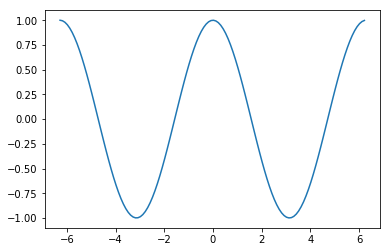

In [65]:
x = np.arange(-2*3.14, 2*3.14, 0.1)
y = np.cos(x)
plt.plot(x, y)
plt.show()      # グラフの表示

※ サンプリングが細かいため滑らかに見えるが、実際は折れ線

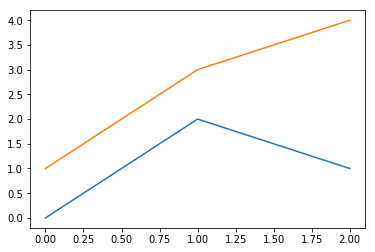

In [66]:
y1 = [0, 2, 1]
y2 = [1, 3, 4]

plt.plot(y1)    # x軸を与えなければインデックスが使われる
plt.plot(y2)
plt.show()      # 重ねて表示される

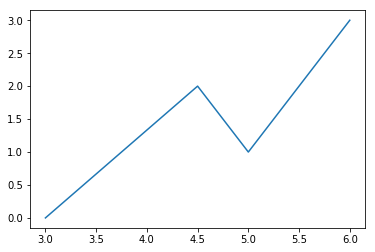

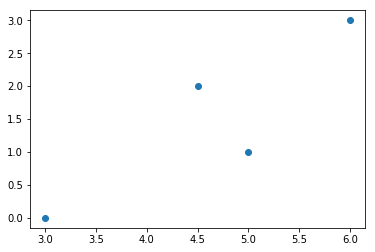

In [67]:
x = [3, 4.5, 5, 6]
y = [0, 2, 1, 3]

plt.plot(x, y)
plt.show()

# scatter plot
plt.plot(x, y, 'o')
plt.show()

より細かいプロットの設定については、マニュアルを参照してください。

参考：
- http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot

### ヒストグラム（pyplot.hist）

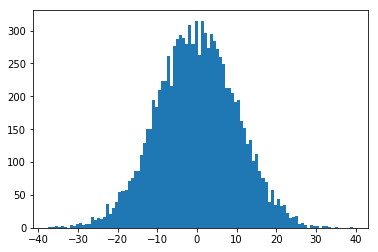

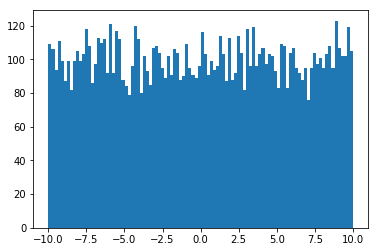

In [68]:
# ガウス分布
r = np.random.normal(0, 10, 10000)  # この数字を色々変えてみましょう。
plt.hist(r, bins=100)
plt.show()

# 一様乱数
r = np.random.uniform(-10, 10, 10000)  # この数字を変えてみよう。
plt.hist(r, bins=100)
plt.show()

### 2次元画像の扱い（pyplot.imshow）

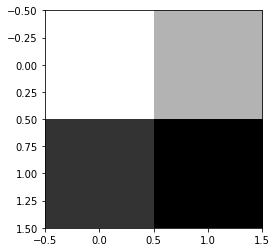

In [69]:
# By default, largest value is assigned as white, smallest value is assigned as black
a = [[1.0, 0.7], [0.2, 0.0]]
plt.imshow(a, cmap='gray', interpolation='none')
plt.show()

### グラフの分割（figure, subplot）

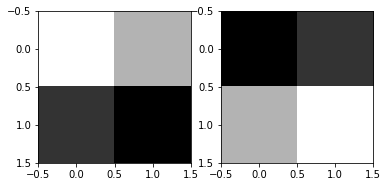

In [70]:
a = [[1.0, 0.7], [0.2, 0.0]]
b = [[0.0, 0.2], [0.7, 1.0]]

fig = plt.figure()
sp = fig.add_subplot(1, 2, 1)  # タテ１　ヨコ２　１番目
sp.imshow(a, cmap='gray', interpolation='none')
sp = fig.add_subplot(1, 2, 2)  # タテ１　ヨコ２　２番目
sp.imshow(b, cmap='gray', interpolation='none')
plt.show()

## 3. scikit-learn（sklearn）

Pythonの機械学習ライブラリであり、様々な手法をサポートしているだけでなく、機械学習を行う上での便利機能も充実している。

深層学習についてはサポートされていないので、本講座では主に便利機能を中心に利用することになる。

参考：
- http://scikit-learn.org/stable/

### shuffle

in-placeでnumpy配列の要素の順番をランダムに入れ替えるscikit-learnの関数

ランダムネスはnumpy.randomモジュールによって決まるので、seedの指定がやはり機能する

また、scikit-learnの関数でランダムネスがあるものは基本的に引数でRandomStateを指定でき、目的別の乱数生成などに使用可能

In [71]:
from sklearn.utils import shuffle

np.random.seed()
print(shuffle(range(10)))
print(shuffle(range(10)))
print()

np.random.seed(12345)
print(shuffle(range(10)))
print(shuffle(range(10)))
print()

np.random.seed(12345)
print(shuffle(range(10)))
print(shuffle(range(10)))
print()

rng0 = np.random.RandomState(12345)
rng1 = np.random.RandomState(34567)

print(shuffle(range(10), random_state=rng0))
print(shuffle(range(10), random_state=rng1))
print(shuffle(range(10), random_state=rng0))
print(shuffle(range(10), random_state=rng1))
print()


rng0 = np.random.RandomState(12345)
rng1 = np.random.RandomState(34567)

print(shuffle(range(10), random_state=rng1))
print(shuffle(range(10), random_state=rng1))
print(shuffle(range(10), random_state=rng0))
print(shuffle(range(10), random_state=rng0))

[0, 2, 8, 3, 7, 4, 6, 1, 9, 5]
[0, 1, 5, 8, 2, 3, 6, 9, 7, 4]

[0, 7, 3, 9, 6, 4, 1, 8, 5, 2]
[4, 0, 9, 5, 7, 3, 8, 6, 1, 2]

[0, 7, 3, 9, 6, 4, 1, 8, 5, 2]
[4, 0, 9, 5, 7, 3, 8, 6, 1, 2]

[0, 7, 3, 9, 6, 4, 1, 8, 5, 2]
[3, 0, 5, 1, 7, 8, 4, 9, 6, 2]
[4, 0, 9, 5, 7, 3, 8, 6, 1, 2]
[9, 7, 4, 1, 6, 5, 2, 0, 8, 3]

[3, 0, 5, 1, 7, 8, 4, 9, 6, 2]
[9, 7, 4, 1, 6, 5, 2, 0, 8, 3]
[0, 7, 3, 9, 6, 4, 1, 8, 5, 2]
[4, 0, 9, 5, 7, 3, 8, 6, 1, 2]


### train_test_split

学習データとテストデータを高速に分割してくれる

In [72]:
from sklearn.model_selection import train_test_split
import string

lettersAtoE = string.ascii_uppercase[:5]
print(lettersAtoE)
print()

train0to4, test0to4, trainAtoE, testAtoE = train_test_split(range(5), lettersAtoE)

# ABCDEを01234と読みかえるとどうなるか？
print(train0to4)
print(trainAtoE)
print()

print(test0to4)
print(testAtoE)

ABCDE

[3, 1, 2]
['D', 'B', 'C']

[4, 0]
['E', 'A']


### データセットの取得

scikit-learnには幾つかの著名なデータセットが付属しており、`sklearn.datasets.load_(データセット名)`という関数で簡単に使える。

またそれ以外にも、mldata.orgという機械学習データのリポジトリにあるデータセットは`sklearn.datasets.fetch_mldata`関数により簡単に取得可能である。

ここでは、かの有名な手書き数字データセットMNISTを`fetch_mldata`関数によって取得してみよう。

参考：
- http://yann.lecun.com/exdb/mnist/

(70000, 784)
(70000,)
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}


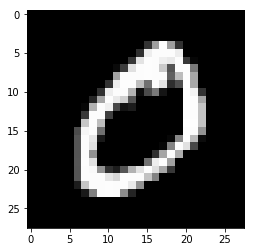

In [73]:
from sklearn.datasets import fetch_mldata

# load data on your directry ~/scikit_learn_data/mldata/
# if data does'nt exist, it downloads the data from site.
mnist = fetch_mldata('MNIST original')

# mnist.dataにはたくさんの画像データ（手書き数字）が入っている。
print(mnist.data.shape)  # image 28 x 28 pixel
print(mnist.target.shape)  # the label 0,1,2,...,9
print(set(mnist.target))

plt.imshow(mnist.data[0].reshape(28, 28), cmap='gray', interpolation='none')
plt.show()

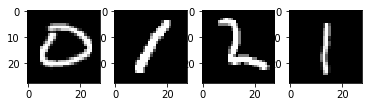

In [74]:
import sklearn
imgs = list(map(lambda x: x.reshape(28, 28), sklearn.utils.shuffle(mnist.data)))

row, col = 1, 4

fig = plt.figure()
for i in range(row*col):
    sp = fig.add_subplot(row, col, i+1)  
    sp.imshow(imgs[i], cmap='gray', interpolation='none')
plt.show()

### Train, Validation, Test 例

In [75]:
# Select one of Classifeir (LinearSVC, KNeighbor, SDG) using validation set
# and test best set

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score

mnist = fetch_mldata('MNIST original')
M = len(mnist.data)
N = 2000  # Use part of MNIST data to save computation time
# randomly select N numbers from 0 to M
selected = shuffle(range(M))[:N]

# Split data into Train, Valid, Test
train_valid_X, test_X, train_valid_y, test_y =\
    train_test_split(mnist.data[selected], mnist.target[selected])
train_X, valid_X, train_y, valid_y =\
    train_test_split(train_valid_X, train_valid_y)

classifiers = [LinearSVC(), KNeighborsClassifier(), SGDClassifier()]

# Train each classifier with Train set
accs = []
for clf_type, classifier in enumerate(classifiers):
    classifier.fit(train_X, train_y)
    pred_train = classifier.predict(train_X)
    acc_train = accuracy_score(train_y, pred_train)
    pred_valid = classifier.predict(valid_X)
    acc_valid = accuracy_score(valid_y, pred_valid)
    print("classifier type: %d, Train Accuracy: %f, Validation Accuracy %f" \
        % (clf_type, acc_train, acc_valid))
    accs.append(acc_valid)

# Chose best classifier with the highest validation accuracy
i_clf_best = np.argmax(accs)
print("Best Classifier: %d" % i_clf_best)
clf_best = classifiers[i_clf_best]

# Test selected classifier
pred = clf_best.predict(test_X)
acc = accuracy_score(test_y, pred)
print("Test(Best Classifier): %f" % acc)

classifier type: 0, Train Accuracy: 1.000000, Validation Accuracy 0.789333
classifier type: 1, Train Accuracy: 0.911111, Validation Accuracy 0.861333
classifier type: 2, Train Accuracy: 0.935111, Validation Accuracy 0.808000
Best Classifier: 1
Test(Best Classifier): 0.870000


## 参考： 画像処理

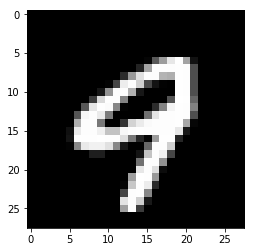

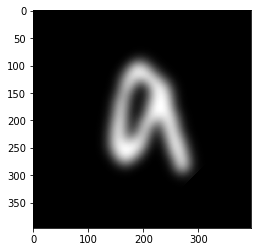

In [76]:
import scipy.ndimage

ZOOM = 10  # 変えてみよう
SIGMA = 10  # 変えてみよう
ANGLE = 45  # 変えてみよう

img = mnist.data[-1].reshape(28, 28)
plt.imshow(img, cmap='gray', interpolation='none')
plt.show()

# 縮小拡大
img = scipy.ndimage.zoom(img, (ZOOM, ZOOM), order=1)
# ぼかし
img = scipy.ndimage.gaussian_filter(img, SIGMA)
# 回転
img = scipy.ndimage.rotate(img, ANGLE)

plt.imshow(img, cmap='gray', interpolation='none')
plt.show()
# edge抽出など
# http://scikit-image.org/docs/dev/auto_examples/plot_canny.html
# http://www.tp.umu.se/~nylen/fnm/pylect/advanced/image_processing/index.html

## 問題 2

2-1. `mnist.data` には画像は何枚あるでしょうか。

2-2. 画像データはどのようなグレースケールで表されているでしょうか。

2-3. ４枚の数字を 縦2 $\times$ 横2 で表示してみましょう。

2-4. mnist にはどの数字がどれだけ入っているでしょうか。

70000
uint8
255
0
{0.0: 6903, 1.0: 7877, 2.0: 6990, 3.0: 7141, 4.0: 6824, 5.0: 6313, 6.0: 6876, 7.0: 7293, 8.0: 6825, 9.0: 6958}


Counter({0.0: 6903,
         1.0: 7877,
         2.0: 6990,
         3.0: 7141,
         4.0: 6824,
         5.0: 6313,
         6.0: 6876,
         7.0: 7293,
         8.0: 6825,
         9.0: 6958})

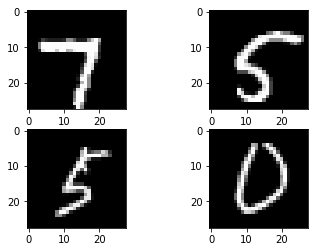

In [77]:
import sklearn

mnist = sklearn.datasets.fetch_mldata('MNIST original')

# 2-1
print(len(mnist.data))

# 2-2
print(mnist.data.dtype)
print(mnist.data.max())
print(mnist.data.min())

# 2-3
imgs = list(map(lambda x: x.reshape(28, 28), sklearn.utils.shuffle(mnist.data)))

fig = plt.figure()
for i in range(4):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(imgs[i], cmap='gray', interpolation='none')
    
# 2-4
print({tag:list(mnist.target).count(tag) for tag in sorted(set(mnist.target))})

# 2-4 別解
import collections
collections.Counter(mnist.target)